In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Clustering 

In [8]:
Tel_Data = pd.read_csv("Telecom_Churn.csv")
Tel_Data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,90,9.71,8.7,4,2.35,1,False,NaN,NaN,NaN
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,111,9.40,12.7,6,3.43,4,True,NaN,NaN,NaN
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,128,7.23,5.4,9,1.46,4,True,NaN,NaN,NaN
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,105,8.53,7.7,6,2.08,2,False,NaN,NaN,NaN
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,90,8.04,11.1,1,3.00,1,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,...,94,11.14,11.5,7,3.11,2,False,NaN,NaN,NaN
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,...,73,10.33,8.1,3,2.19,1,False,NaN,NaN,NaN
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,...,134,9.45,13.2,8,3.56,3,False,NaN,NaN,NaN
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,...,82,8.72,11.6,4,3.13,1,False,NaN,NaN,NaN


In [9]:
Tel_Data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [10]:
Tel_Data.drop(columns = ['Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'],axis=1,inplace = True)

In [3]:
#### Null Value Treatment

In [11]:
Tel_Data.isnull()

#True means that it is a null value.
# False means that it is not a null value. 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
663,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
664,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
665,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
Tel_Data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [22]:
cat = []
num = []

In [23]:
for i in Tel_Data.drop(columns = 'Churn').columns:
    if Tel_Data[i].dtype == "object":
        cat.append(i)

    else:
        num.append(i)

In [13]:
# total null values in the data is zero.

Tel_Data.isnull().sum().sum()

np.int64(0)

In [15]:
# how many rows are there where the rows are absolutely duplicated to each other. 
# There is 0 rows which are absolutely similar to each other.
Tel_Data.duplicated().sum()

np.int64(0)

In [ ]:
### Outlier treatment

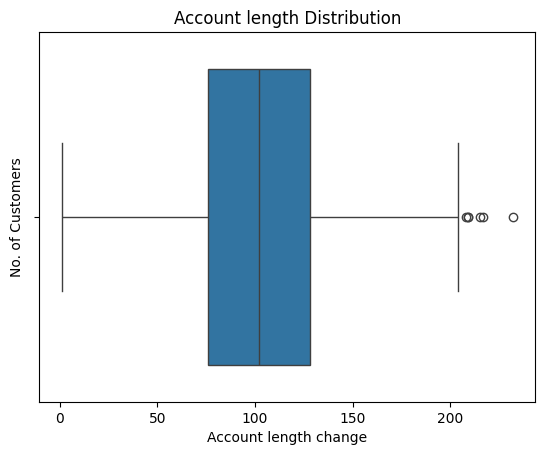

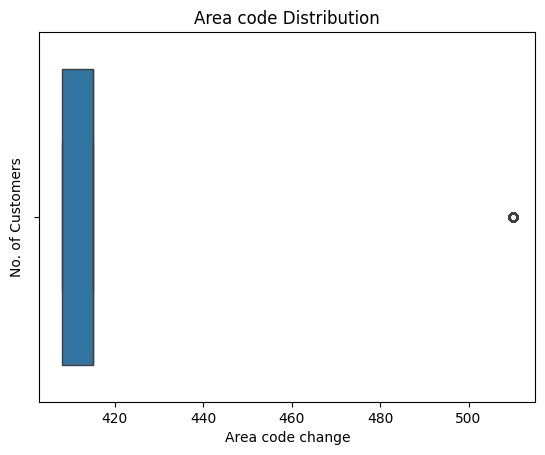

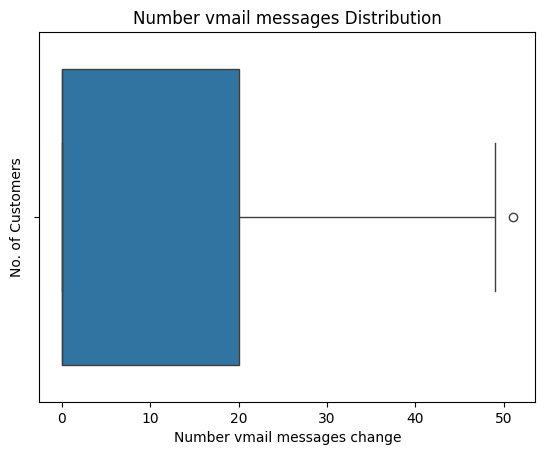

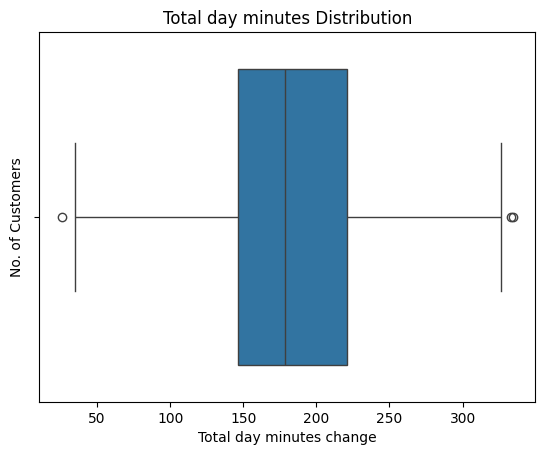

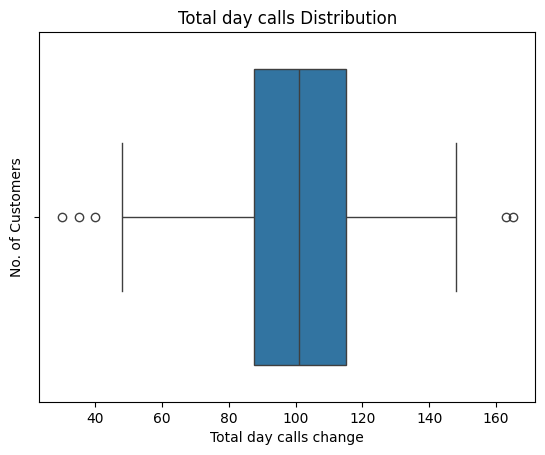

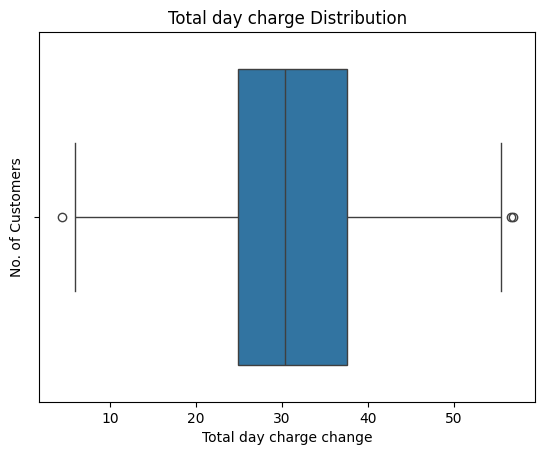

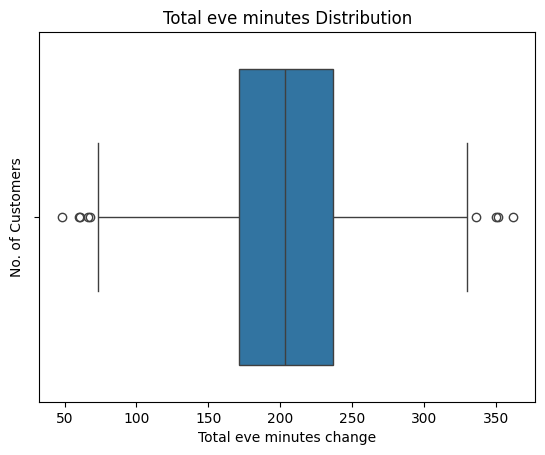

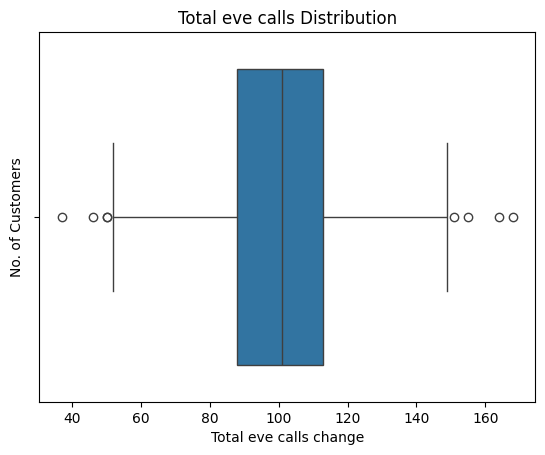

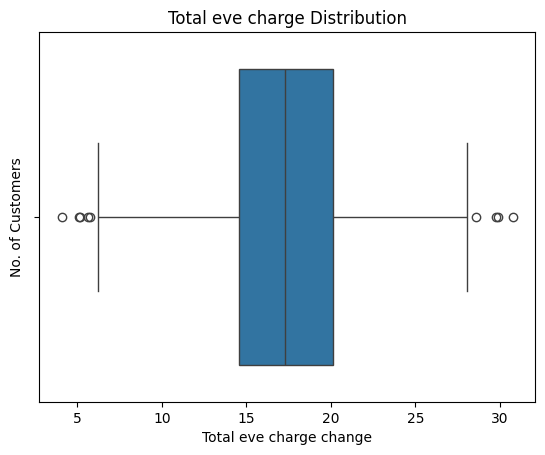

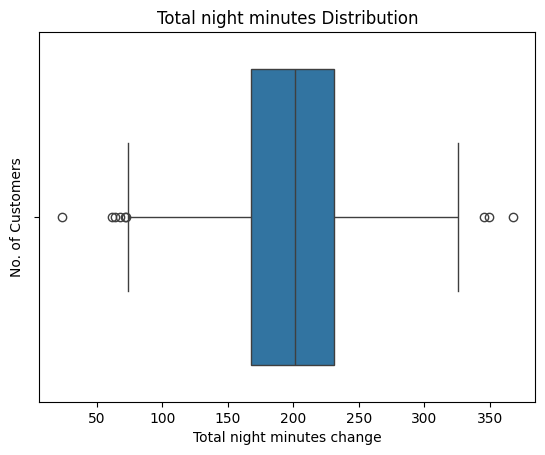

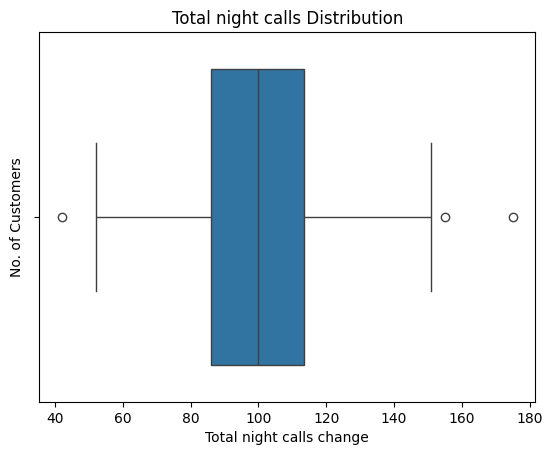

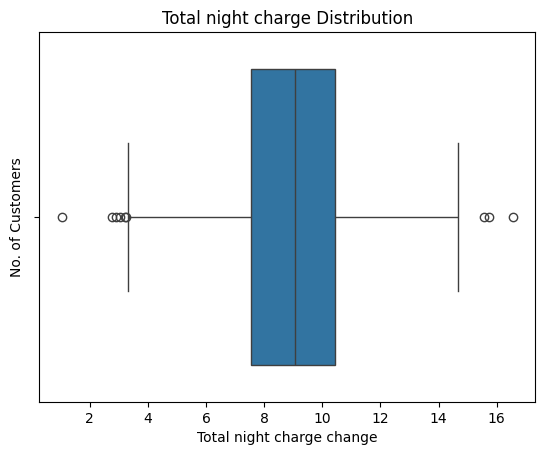

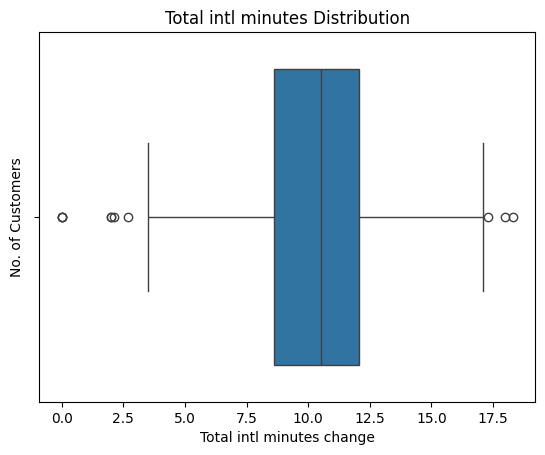

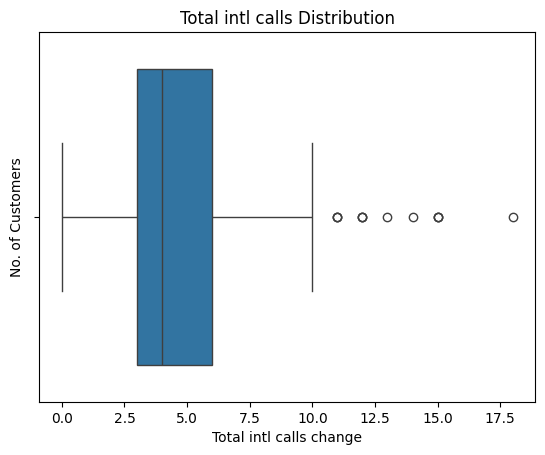

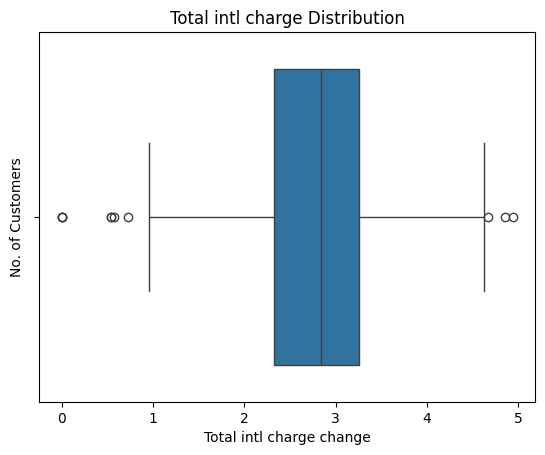

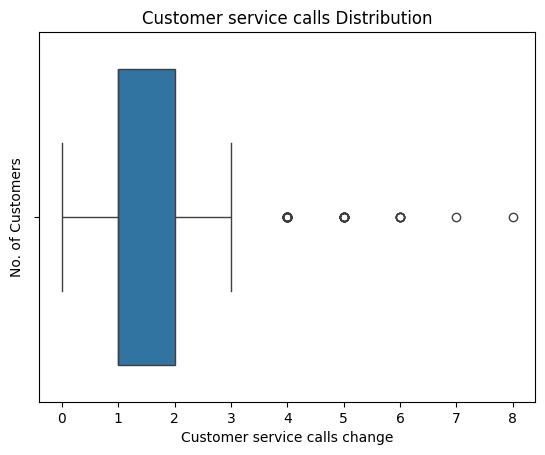

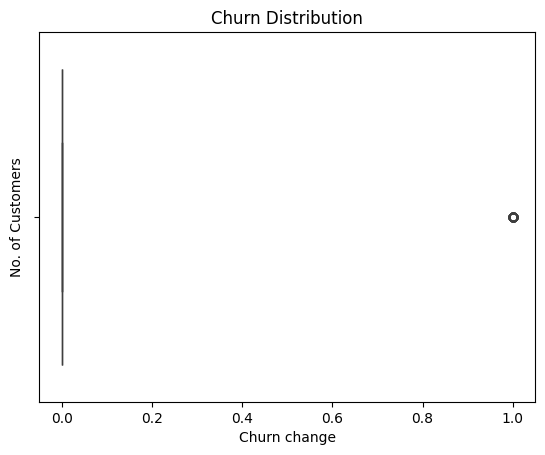

In [21]:
for i in num:
    ax = sns.boxplot(data = Tel_Data, x = i)
    ax.set(title = '{} Distribution'.format(i), xlabel = '{} change'.format(i), ylabel= 'No. of Customers')
    plt.show()

In [24]:
Q1 = Tel_Data['Account length'].quantile(0.25)
Q1 #if you see in the boxplot of accountlength you'll see that q1 is infact 76. 

np.float64(76.0)

In [25]:
Q3 = Tel_Data['Account length'].quantile(0.75)
Q3

np.float64(128.0)

In [26]:
IQR = Q3-Q1
IQR

np.float64(52.0)

In [27]:
lower_range = Q1 - 1.5* IQR
lower_range

np.float64(-2.0)

In [28]:
upper_range = Q3 + 1.5* IQR
upper_range

np.float64(206.0)

In [ ]:
# if there are many many outliers then it is not good to bring them all up in the outlier treatment thingy -- then they need to be separated individually and there would be some inner pattern lying somewhere, take good care of that. 
# but if there are fewer outliers like below treat them like this below and get those outliers to the lower range or the upper range point. 

In [35]:
# boxplot sirf numerical variable ka hi hota hai. not of categorical variable. periodd. 
for col in num:
    Q1 = Tel_Data[col].quantile(0.25)
    Q3 = Tel_Data[col].quantile(0.75)
    IQR = Q3-Q1
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR
    Tel_Data[col] = np.where(Tel_Data[col] > upper_range, upper_range, Tel_Data[col]) #replace
    Tel_Data[col] = np.where(Tel_Data[col]< lower_range, lower_range, Tel_Data[col])
# 1. any point lesser than lower_range to be replaced by lr. 
# 2. and any point greater than upper_range to be replaced by ur. 

In [29]:
num

['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

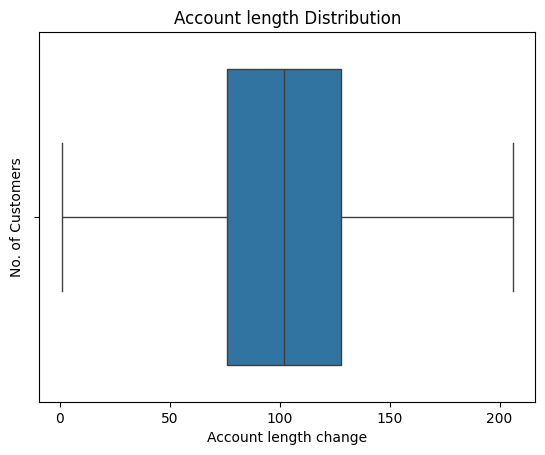

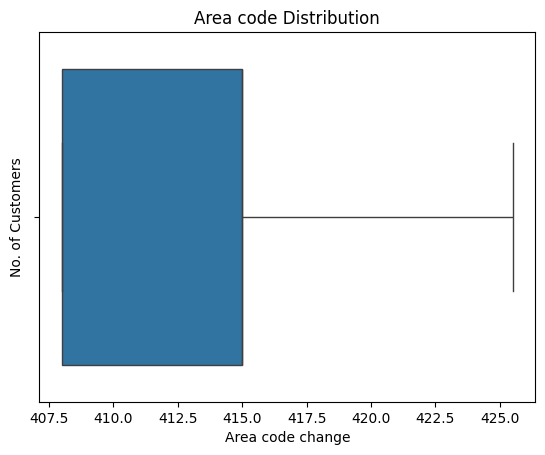

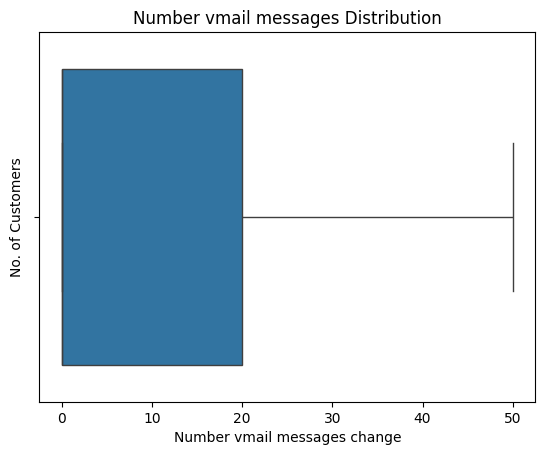

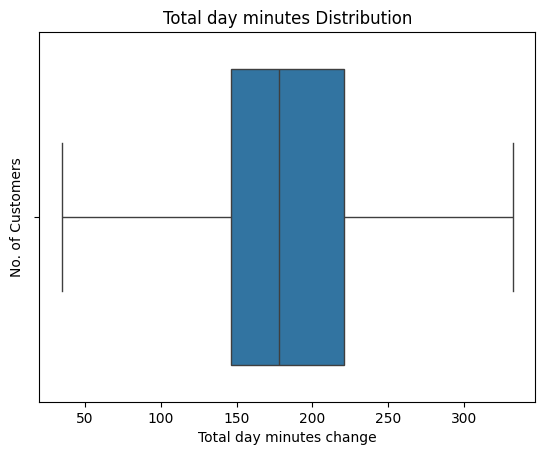

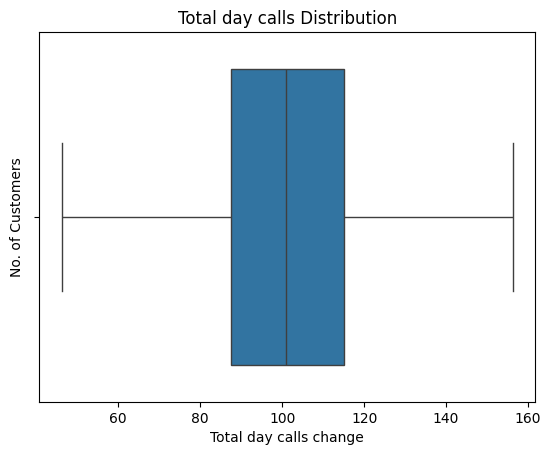

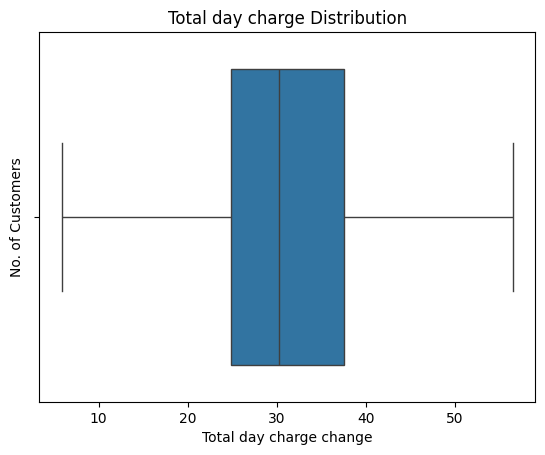

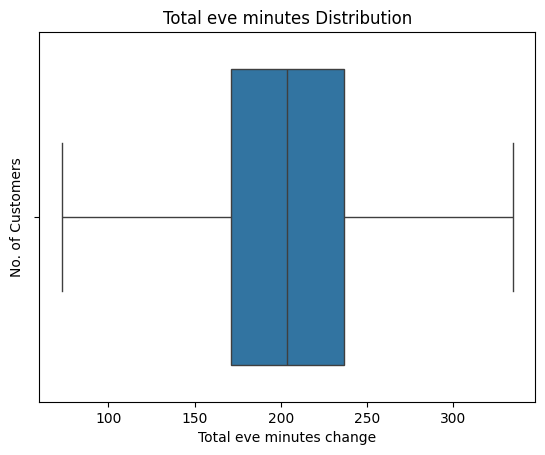

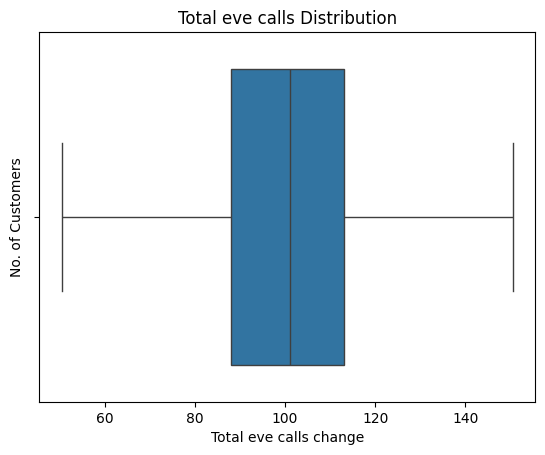

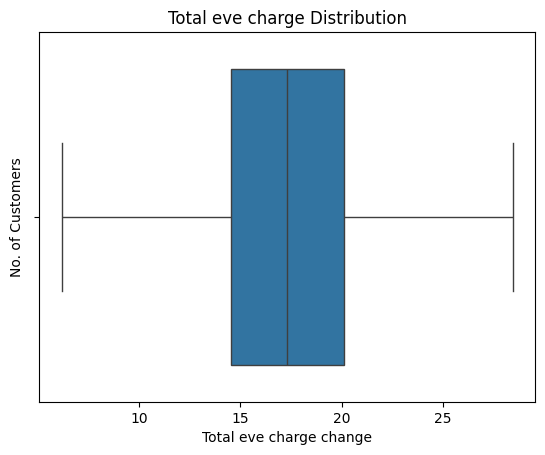

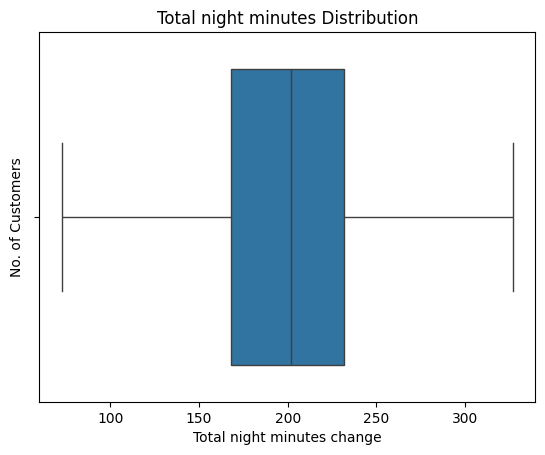

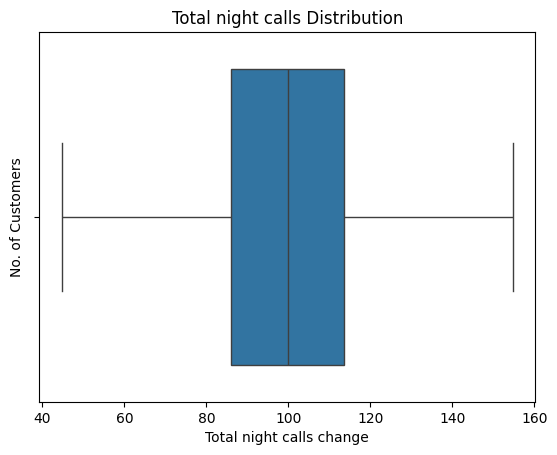

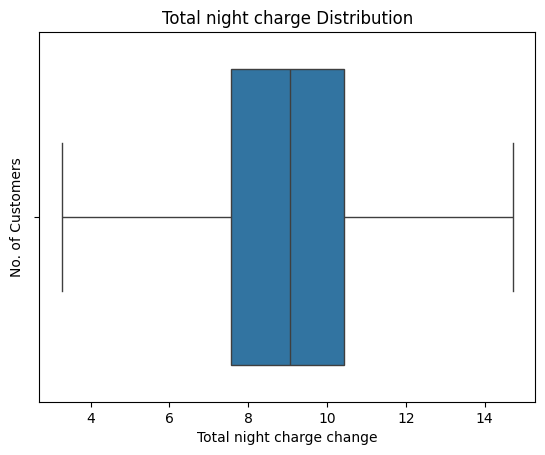

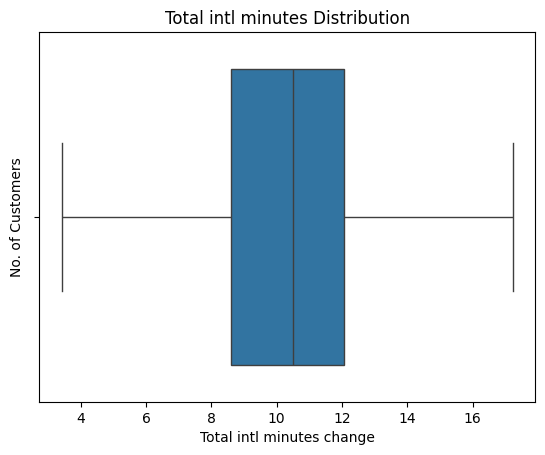

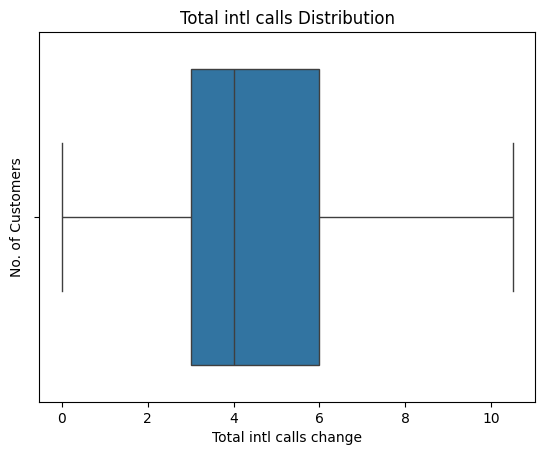

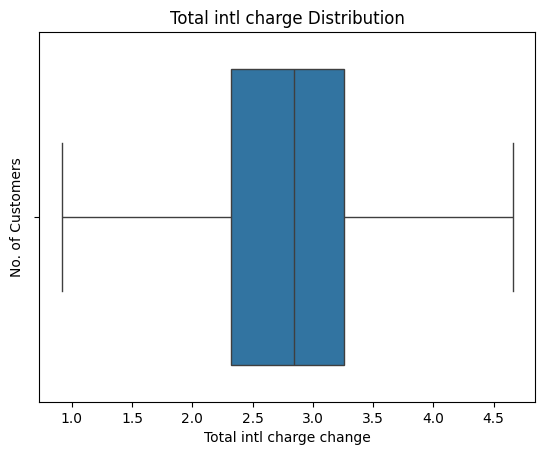

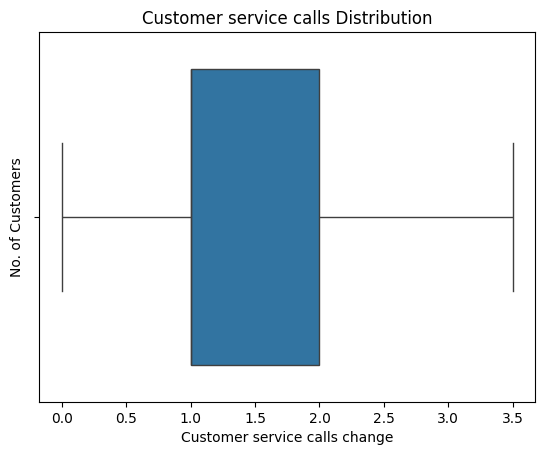

In [36]:
for i in num:
    ax = sns.boxplot(data = Tel_Data, x = i)
    ax.set(title = '{} Distribution'.format(i), xlabel = '{} change'.format(i), ylabel= 'No. of Customers')
    plt.show()

In [ ]:
# use this function to remove the outliers

def remove_outlier(col):
    sorted(col) # sort the column from ascending order to descending order. 
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range,upper_range

In [ ]:
# for col in num:
#     lr, ur =remove_outlier(Tel_Data[col])
#     Tel_Data[col] = np.where(Tel_Data[col] > upper_range,upper_range,Tel_Data[col])
#     Tel_Data[col] = np.where(Tel_Data[col] < lower_range, lower_range, Tel_Data[col])

## Hierarchical Clustering

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage

ModuleNotFoundError: No module named 'scipy'